In [1]:
import xarray as xr

# Open ERA5 NetCDF datasets
ds_accum = xr.open_dataset("ERA5/data_stream-oper_stepType-accum.nc")
ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")


In [2]:
# Subset to Indian subcontinent (adjust slice order if lat is descending)
sub_accum = ds_accum.sel(latitude=slice(38.5, 6.0), longitude=slice(66.0, 100.0))
sub_inst = ds_inst.sel(latitude=slice(38.5, 6.0), longitude=slice(66.0, 100.0))


In [3]:
sub_accum.to_netcdf("ERA5_IndianSubcontinent_accum.nc")
sub_inst.to_netcdf("ERA5_IndianSubcontinent_instant.nc")


In [4]:
print(sub_accum.variables)
print(sub_inst.variables)


Frozen({'number': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 744)> Size: 6kB
array(['2020-10-01T00:00:00.000000000', '2020-10-01T01:00:00.000000000',
       '2020-10-01T02:00:00.000000000', ..., '2020-10-31T21:00:00.000000000',
       '2020-10-31T22:00:00.000000000', '2020-10-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 131)> Size: 1kB
array([38.5 , 38.25, 38.  , 37.75, 37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25,
       36.  , 35.75, 35.5 , 35.25, 35.  , 34.75, 34.5 , 34.25, 34.  , 33.75,
       33.5 , 33.25, 33.  , 32.75, 32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25,
       31.  , 30.75, 30.5 , 30.25, 30.  , 29.75, 29.5 , 29.25, 29.  , 28.75,
       28.5 , 28.25, 28.  , 27.7

In [5]:
print(ds_accum.variables)
print(ds_inst.variables)



Frozen({'number': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 744)> Size: 6kB
array(['2020-10-01T00:00:00.000000000', '2020-10-01T01:00:00.000000000',
       '2020-10-01T02:00:00.000000000', ..., '2020-10-31T21:00:00.000000000',
       '2020-10-31T22:00:00.000000000', '2020-10-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 137)> Size: 1kB
array([40.  , 39.75, 39.5 , 39.25, 39.  , 38.75, 38.5 , 38.25, 38.  , 37.75,
       37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25, 36.  , 35.75, 35.5 , 35.25,
       35.  , 34.75, 34.5 , 34.25, 34.  , 33.75, 33.5 , 33.25, 33.  , 32.75,
       32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25,
       30.  , 29.75, 29.5 , 29.2

In [6]:
for var in ds_accum.data_vars:
    print(ds_accum[var])


<xarray.DataArray 'tp' (valid_time: 744, latitude: 137, longitude: 141)> Size: 57MB
[14371848 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2020-10-01 ... 2020-10-31T23:...
  * latitude    (latitude) float64 1kB 40.0 39.75 39.5 39.25 ... 6.5 6.25 6.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    expver      (valid_time) <U4 12kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      19317
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:            

In [7]:
import xarray as xr
import numpy as np
import pandas as pd

file_path_accum = "ERA5/data_stream-oper_stepType-accum.nc"
ds_accum = xr.open_dataset(file_path_accum)

# Define time period
start_date = '2020-10-10'
end_date = '2020-10-15'

# Subset accumulated data for the period
sub_accum = ds_accum.sel(valid_time=slice(start_date, end_date))

# Extract unique dates from valid_time
dates = pd.to_datetime(sub_accum.valid_time.values).normalize().unique()

# Prepare daily convective and stratiform rainfall arrays
convective_daily = []
stratiform_daily = []

for date in dates:
    day_data = sub_accum.sel(valid_time=slice(str(date), str(date + np.timedelta64(1, 'D'))))
    conv_sum = day_data['cp'].sum(dim='valid_time') * 1000  # convert to mm
    strat_sum = (day_data['tp'] - day_data['cp']).sum(dim='valid_time') * 1000  # convert to mm
    convective_daily.append(conv_sum)
    stratiform_daily.append(strat_sum)

# Stack daily data into a single xarray DataArray for easier plotting
convective_daily = xr.concat(convective_daily, dim='day')
stratiform_daily = xr.concat(stratiform_daily, dim='day')

# Assign day coordinate as string dates
convective_daily = convective_daily.assign_coords(day=[str(d.date()) for d in dates])
stratiform_daily = stratiform_daily.assign_coords(day=[str(d.date()) for d in dates])

# Extract lat/lon
lats = sub_accum['latitude']
lons = sub_accum['longitude']


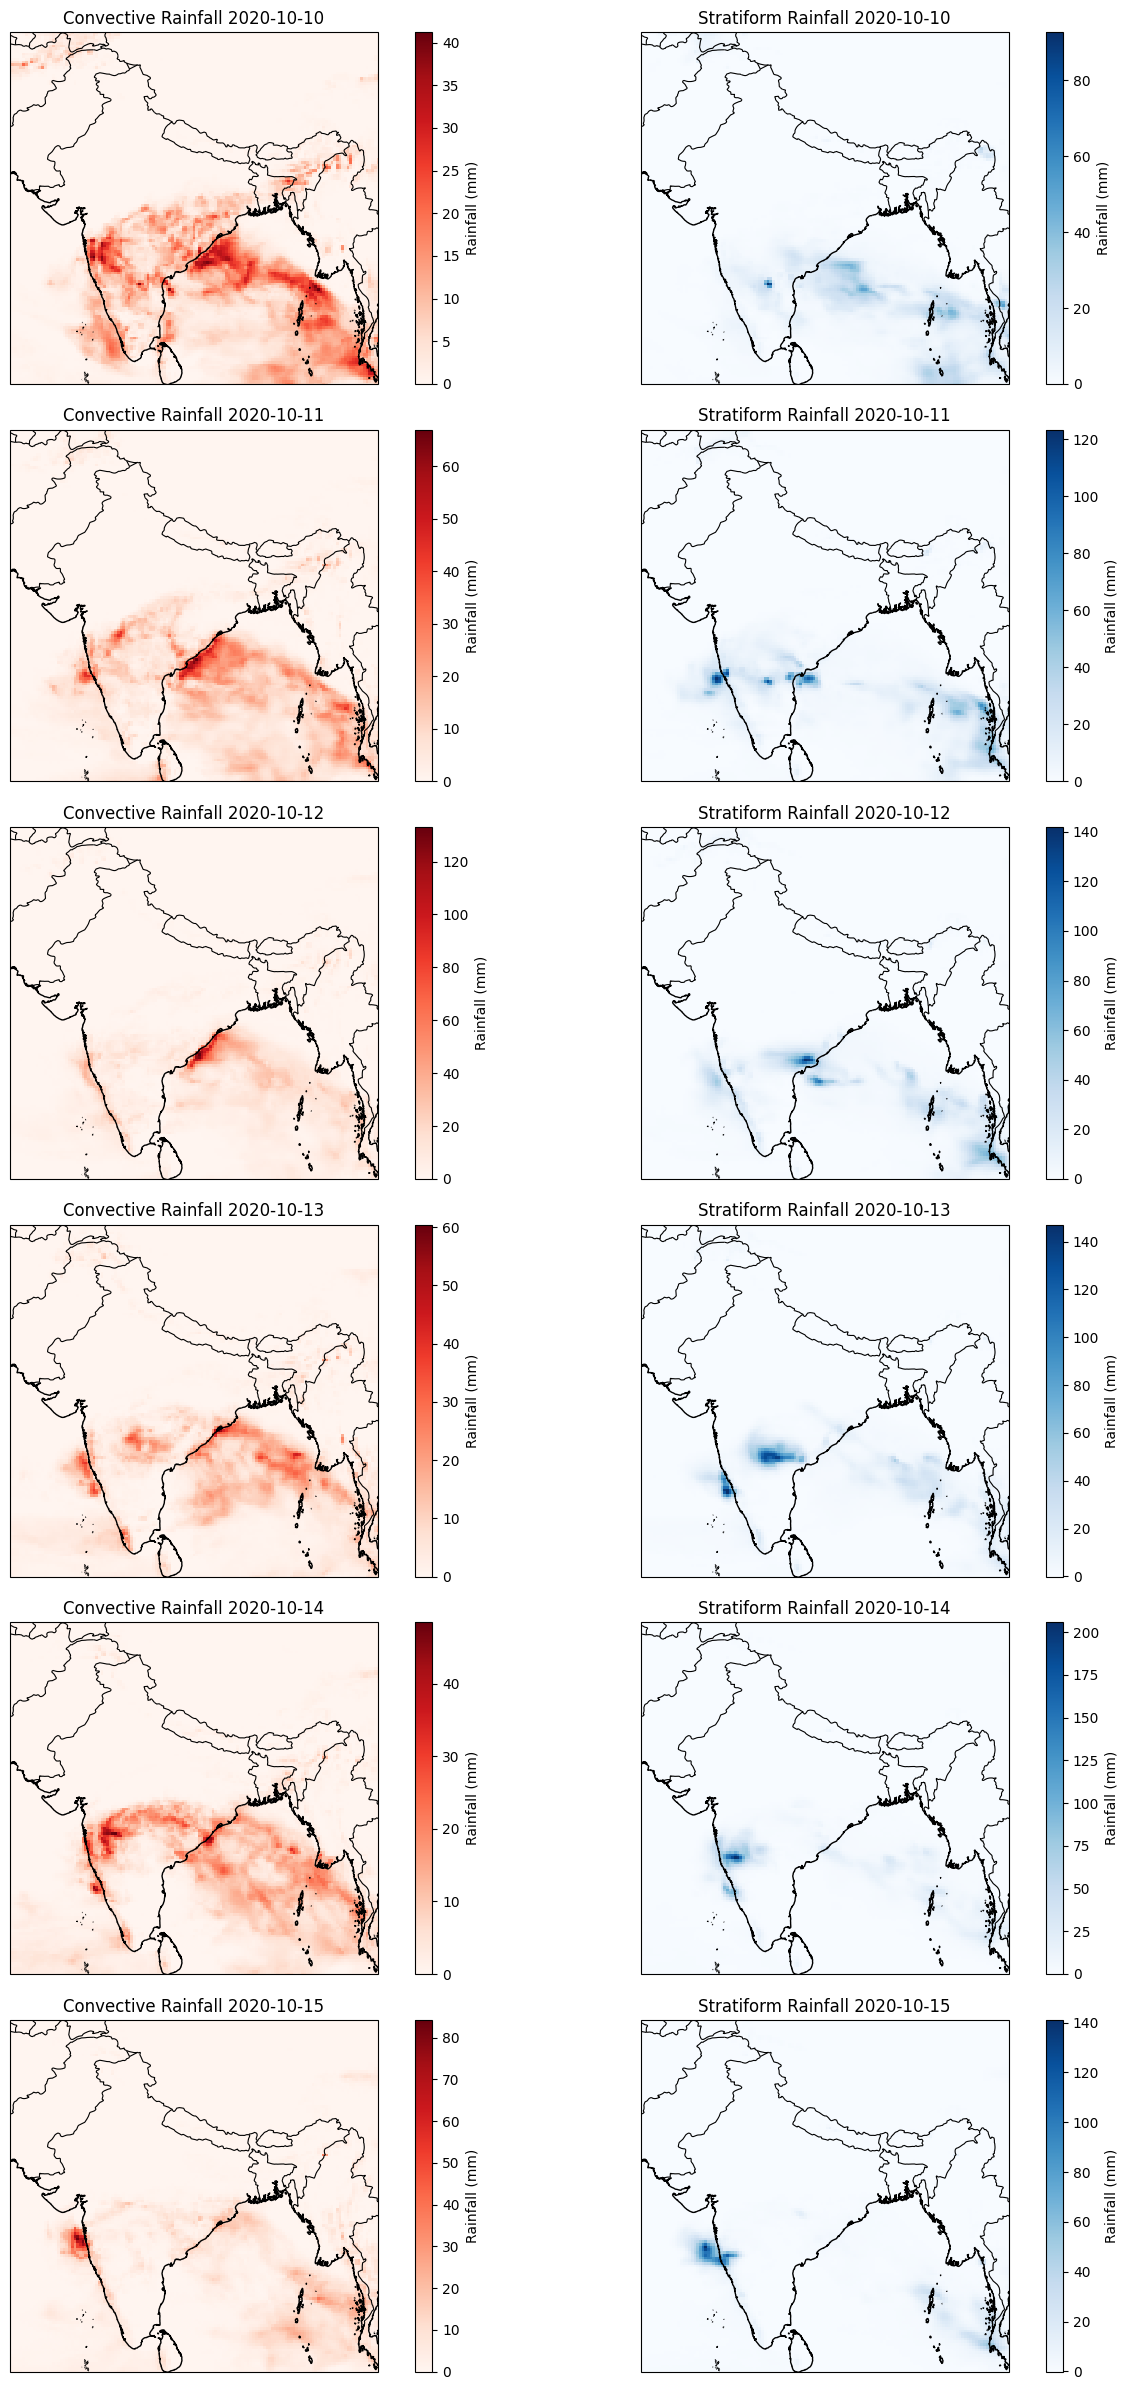

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [66, 100, 6, 38.5]

def plot_daily_rainfall(convective, stratiform, lons, lats, dates):
    n_days = len(dates)
    fig, axes = plt.subplots(n_days, 2, figsize=(14, 4 * n_days), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, day in enumerate(dates):
        # Convective rainfall
        ax = axes[i, 0]
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines(resolution='10m')
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        mesh = ax.pcolormesh(lons, lats, convective.sel(day=str(day.date())), cmap='Reds', shading='auto', transform=ccrs.PlateCarree())
        ax.set_title(f'Convective Rainfall {str(day.date())}')
        plt.colorbar(mesh, ax=ax, orientation='vertical', label='Rainfall (mm)')

        # Stratiform rainfall
        ax = axes[i, 1]
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines(resolution='10m')
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        mesh = ax.pcolormesh(lons, lats, stratiform.sel(day=str(day.date())), cmap='Blues', shading='auto', transform=ccrs.PlateCarree())
        ax.set_title(f'Stratiform Rainfall {str(day.date())}')
        plt.colorbar(mesh, ax=ax, orientation='vertical', label='Rainfall (mm)')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_daily_rainfall(convective_daily, stratiform_daily, lons, lats, dates)


In [9]:
convective = ds_accum['cp'].sum(dim='valid_time') * 1000  # Converts from meters to mm
stratiform = (ds_accum['tp'] - ds_accum['cp']).sum(dim='valid_time') * 1000


In [10]:
convective_mask = (
    (ds_inst['cbh'] > 2000) &
    (ds_inst['tcrw'] > 0.5) &
    (ds_inst['ptype'].isin([1, 4]))
)
stratiform_mask = (
    (ds_inst['lcc'] > 0.7) &
    (ds_inst['tclw'] > 0.3) &
    (ds_inst['ptype'].isin([3, 5]))
)
convective_refined = convective.where(convective_mask)
stratiform_refined = stratiform.where(stratiform_mask)


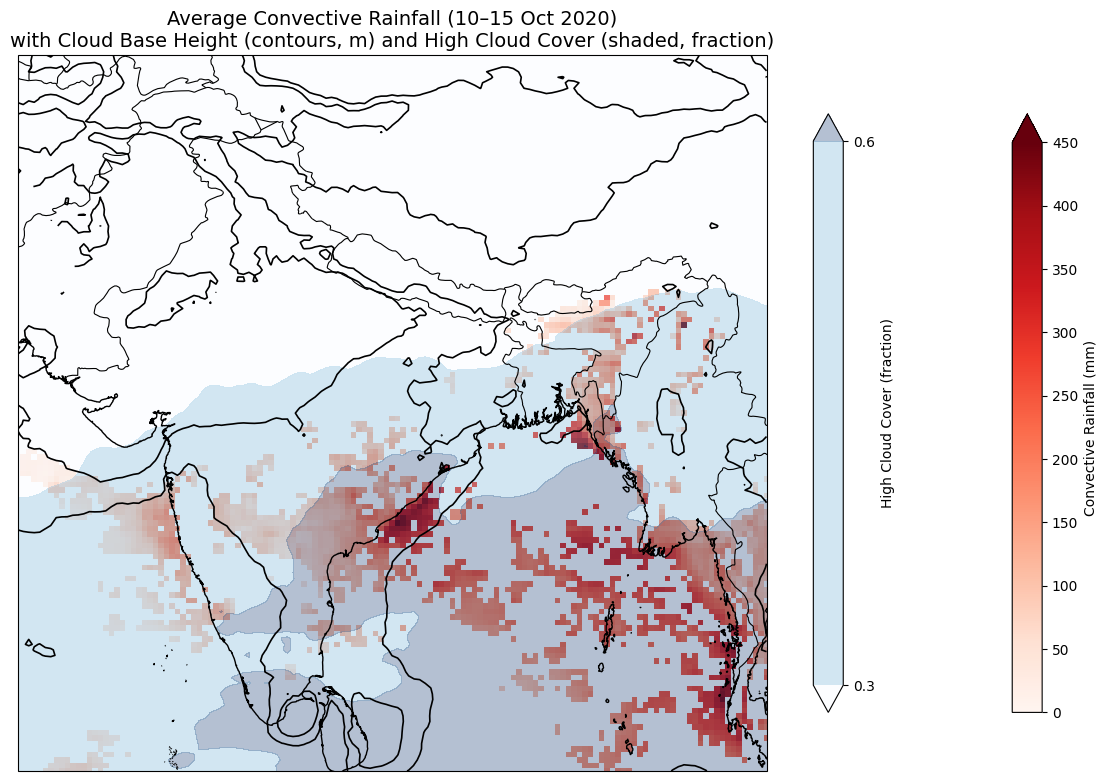

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Prepare 2D data as before
convective_refined_2d = convective_refined.mean(dim='valid_time')
cbh_2d = ds_inst['cbh'].mean(dim='valid_time')
hcc_2d = ds_inst['hcc'].mean(dim='valid_time')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Plot convective rainfall with units in colorbar
rain_mesh = convective_refined_2d.plot.pcolormesh(
    ax=ax, cmap='Reds', add_labels=False, 
    vmin=0, vmax=450,  # Adjust as per your data range
    cbar_kwargs={'label': 'Convective Rainfall (mm)', 'shrink': 0.8})

# Overlay cloud base height contours (in meters)
cbh_contour = cbh_2d.plot.contour(
    ax=ax, levels=[1500, 3000], colors='black', linewidths=1.2, add_labels=False)

# Overlay high cloud cover (hcc) as shaded contours (fraction 0-1)
hcc_contour = hcc_2d.plot.contourf(
    ax=ax, levels=[0.3, 0.6], cmap='Blues', alpha=0.3, add_colorbar=True,
    cbar_kwargs={'label': 'High Cloud Cover (fraction)', 'shrink': 0.8})

# Map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.set_extent([66, 100, 6, 38.5], crs=ccrs.PlateCarree())

plt.title('Average Convective Rainfall (10–15 Oct 2020)\n'
          'with Cloud Base Height (contours, m) and High Cloud Cover (shaded, fraction)', fontsize=14)
plt.tight_layout()
plt.show()


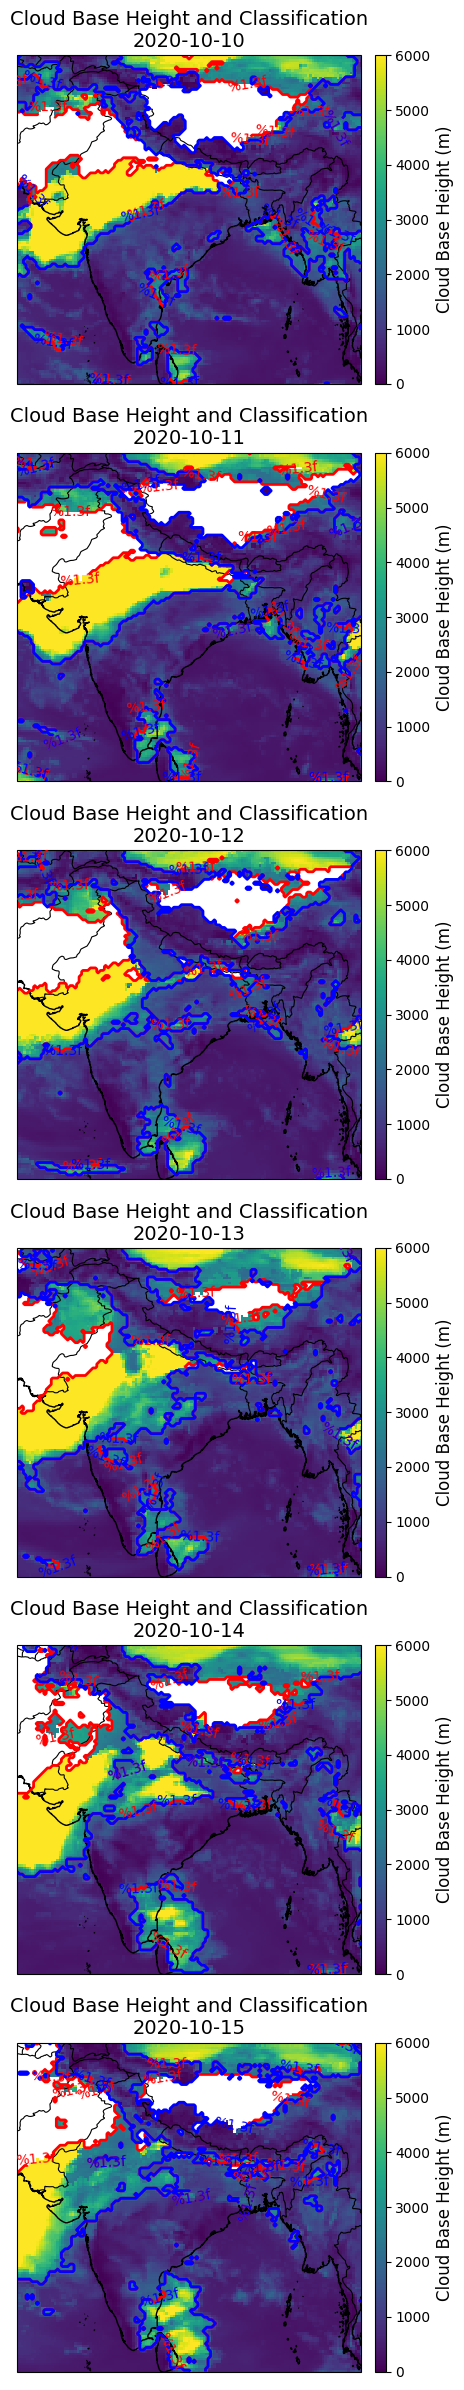

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Assume ds_inst is your ERA5 instantaneous dataset with 'cbh', 'latitude', 'longitude', 'valid_time'
extent = [66, 100, 6, 38.5]

# Get unique days in your period
dates = pd.to_datetime(ds_inst['valid_time'].values).normalize()
unique_days = pd.date_range('2020-10-10', '2020-10-15')
n_days = len(unique_days)

fig, axes = plt.subplots(n_days, 1, figsize=(14, 4 * n_days), subplot_kw={'projection': ccrs.PlateCarree()})

for i, day in enumerate(unique_days):
    # Subset for the day
    day_mask = (dates == day)
    if not np.any(day_mask):
        continue  # Skip if no data for this day
    cbh_day = ds_inst['cbh'].isel(valid_time=day_mask).mean(dim='valid_time')

    ax = axes[i]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)

    # Plot CBH values (in meters)
    mesh = ax.pcolormesh(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day,
        cmap='viridis', shading='auto', vmin=0, vmax=6000,
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.01, aspect=30)
    cbar.set_label('Cloud Base Height (m)', fontsize=12)

    # Overlay convective and stratiform regions as contours
    convective_contour = ax.contour(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day > 2000,
        levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree()
    )
    stratiform_contour = ax.contour(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day <= 2000,
        levels=[0.5], colors='blue', linewidths=2, transform=ccrs.PlateCarree()
    )
    ax.clabel(convective_contour, fmt={1: 'Convective (CBH>2000m)'}, fontsize=10, colors='red')
    ax.clabel(stratiform_contour, fmt={1: 'Stratiform (CBH≤2000m)'}, fontsize=10, colors='blue')

    ax.set_title(f'Cloud Base Height and Classification\n{day.strftime("%Y-%m-%d")}', fontsize=14)

plt.tight_layout()
plt.show()




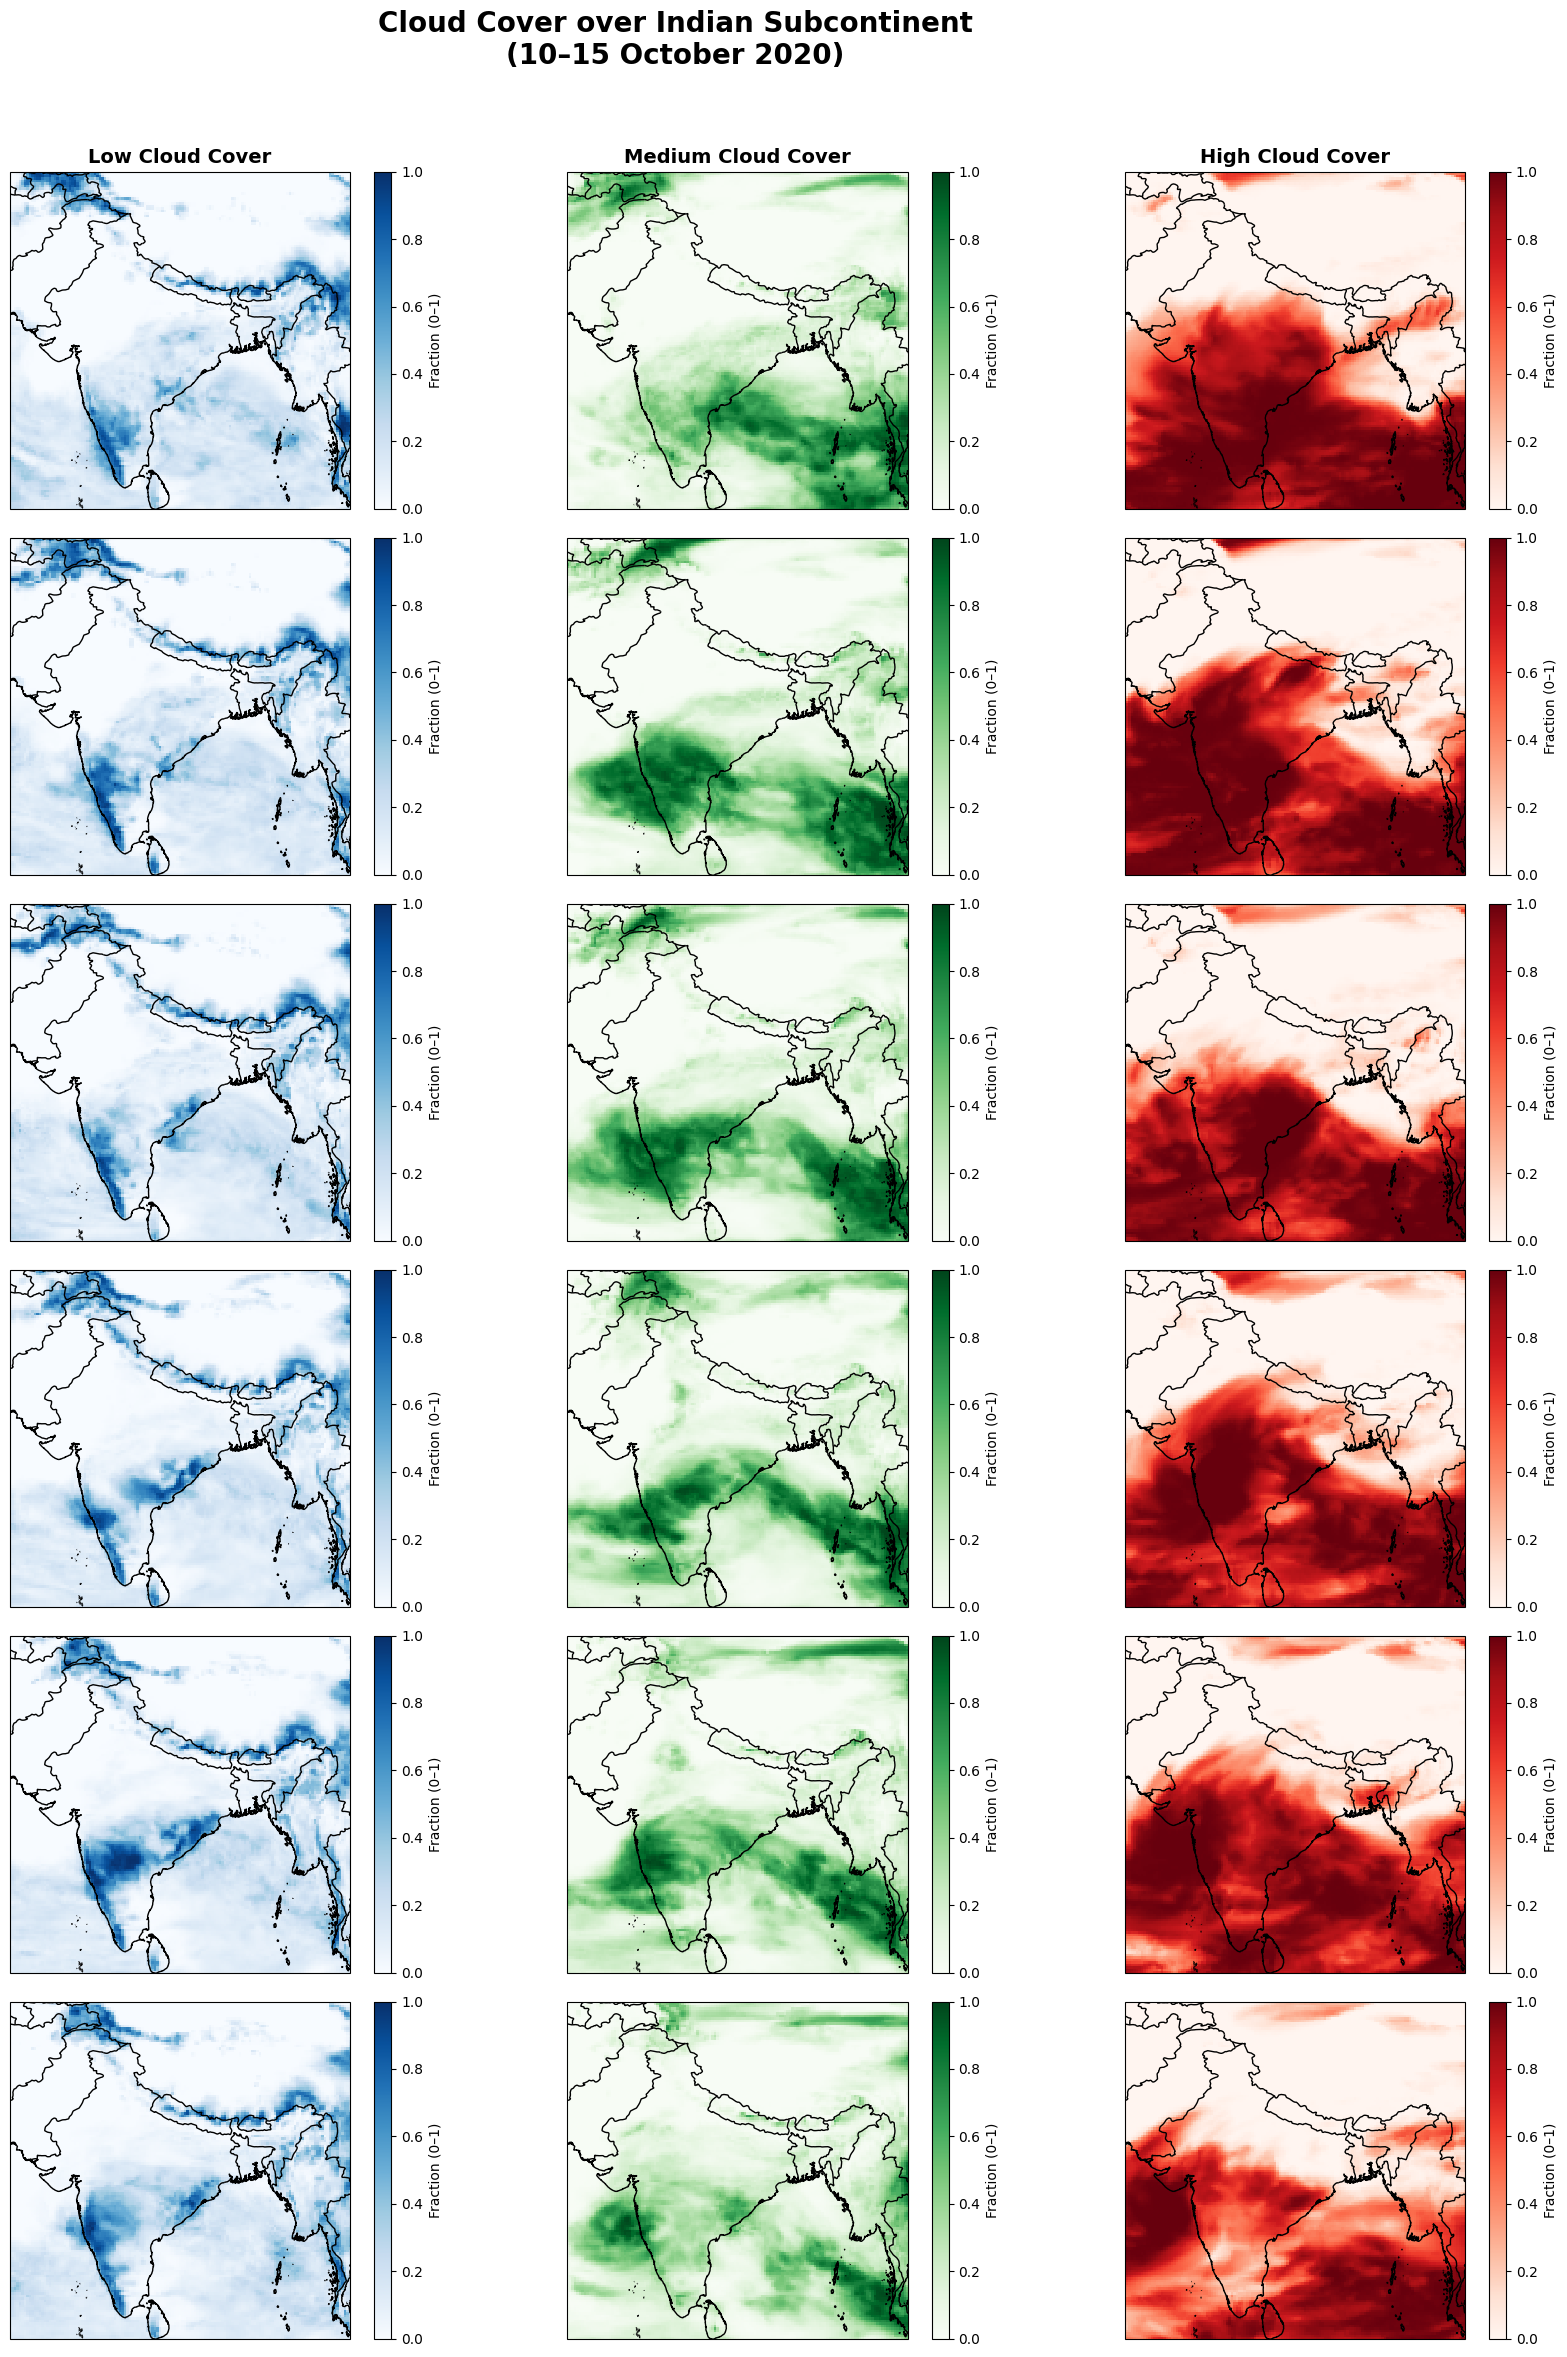

In [13]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Try loading real ERA5 data
try:
    ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")
    sub_inst = ds_inst.sel(valid_time=slice('2020-10-10', '2020-10-15'))
    dates = pd.to_datetime(sub_inst.valid_time.values).normalize().unique()
    
    # Calculate daily means
    lcc_daily = sub_inst['lcc'].resample(valid_time='1D').mean()
    mcc_daily = sub_inst['mcc'].resample(valid_time='1D').mean()
    hcc_daily = sub_inst['hcc'].resample(valid_time='1D').mean()
    
    lats = sub_inst.latitude
    lons = sub_inst.longitude

except FileNotFoundError:
    print("ERA5 file not found. Using dummy data.")
    lats = np.linspace(6, 38.5, 137)
    lons = np.linspace(66, 100, 141)
    dates = pd.date_range('2020-10-10', '2020-10-15')
    
    lcc_daily = xr.DataArray(
        np.random.rand(len(dates), len(lats), len(lons)),
        dims=('day', 'latitude', 'longitude'),
        coords={'day': dates, 'latitude': lats, 'longitude': lons}
    )
    mcc_daily = lcc_daily * 0.8
    hcc_daily = lcc_daily * 0.6

# Plotting section
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    
    extent = [66, 100, 6, 38.5]
    n_days = len(dates)
    
    fig, axes = plt.subplots(n_days, 3, figsize=(18, 4 * n_days), 
                             subplot_kw={'projection': ccrs.PlateCarree()})
    
    cloud_titles = ['Low Cloud Cover', 'Medium Cloud Cover', 'High Cloud Cover']
    cloud_data = [lcc_daily, mcc_daily, hcc_daily]
    cmaps = ['Blues', 'Greens', 'Reds']
    
    for i in range(n_days):
        for j in range(3):
            data = cloud_data[j]
            pcm = axes[i, j].pcolormesh(lons, lats, data[i], 
                                        cmap=cmaps[j], vmin=0, vmax=1,
                                        transform=ccrs.PlateCarree())
            axes[i, j].coastlines(resolution='10m')
            axes[i, j].add_feature(cfeature.BORDERS)
            axes[i, j].set_extent(extent)
            
            if i == 0:
                axes[i, j].set_title(cloud_titles[j], fontsize=14, weight='bold')
            
            cbar = fig.colorbar(pcm, ax=axes[i, j], orientation='vertical', fraction=0.035, pad=0.04)
            cbar.set_label('Fraction (0–1)', fontsize=10)
    
    fig.suptitle("Cloud Cover over Indian Subcontinent\n(10–15 October 2020)", fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for super title
    plt.show()

except ModuleNotFoundError:
    print("Error: Cartopy not installed. Install with:")
    print("conda install -c conda-forge cartopy")






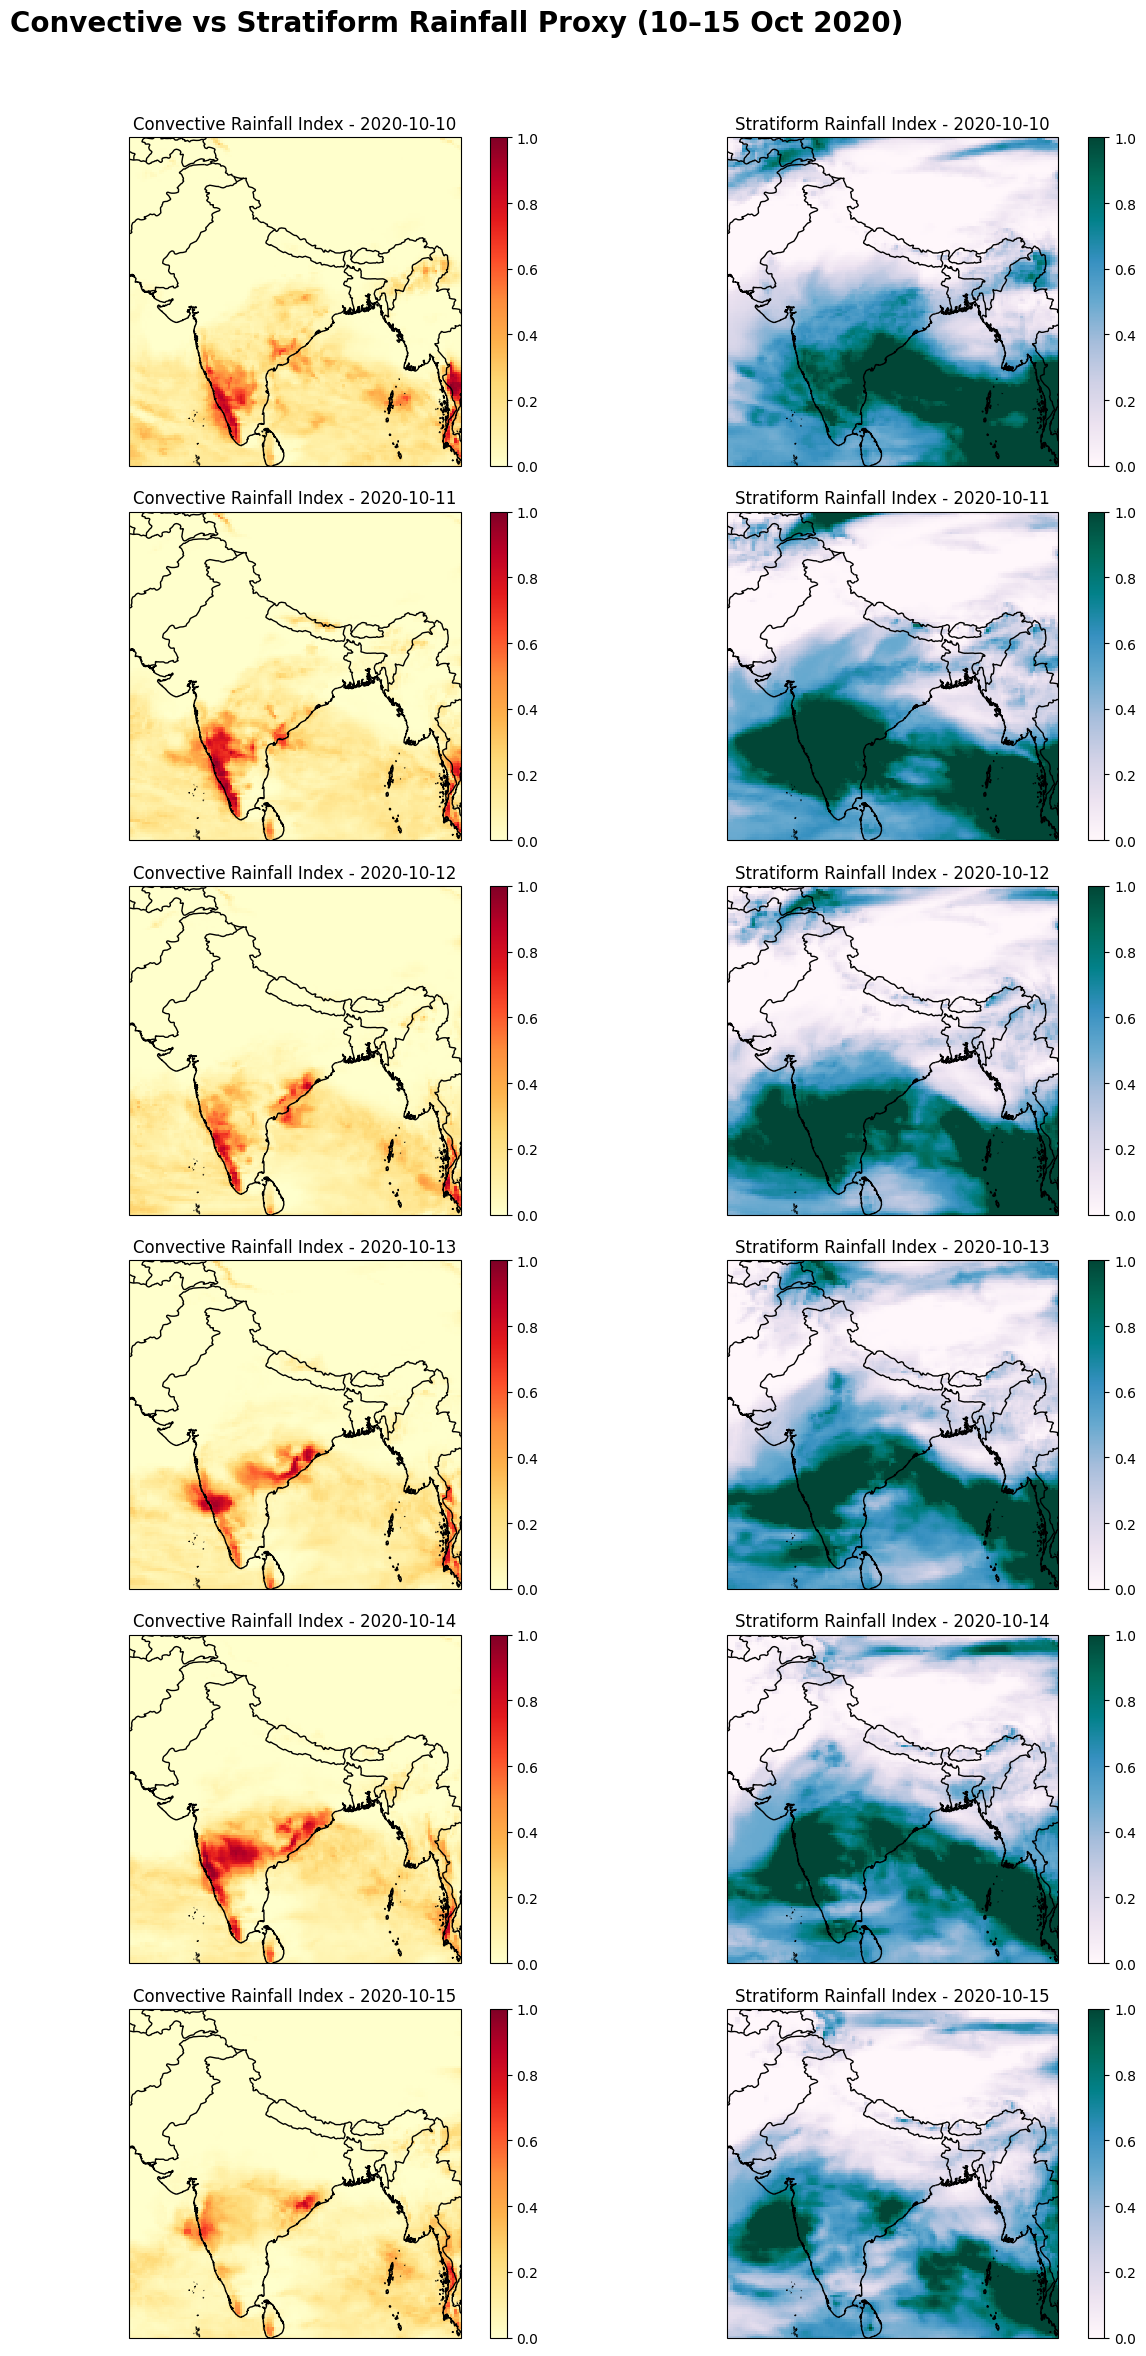

In [14]:
# Calculate daily convective and stratiform indices
convective_index = lcc_daily * hcc_daily
stratiform_index = mcc_daily + 0.5 * hcc_daily

# Plotting with Cartopy
fig, axes = plt.subplots(n_days, 2, figsize=(14, 4 * n_days),
                         subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(n_days):
    # Convective Rainfall Proxy
    pcm1 = axes[i, 0].pcolormesh(lons, lats, convective_index[i],
                                 cmap='YlOrRd', vmin=0, vmax=1,
                                 transform=ccrs.PlateCarree())
    axes[i, 0].set_title(f"Convective Rainfall Index - {dates[i].date()}")
    axes[i, 0].coastlines(resolution='10m')
    axes[i, 0].add_feature(cfeature.BORDERS)
    axes[i, 0].set_extent(extent)
    fig.colorbar(pcm1, ax=axes[i, 0], orientation='vertical', fraction=0.035, pad=0.04)
    
    # Stratiform Rainfall Proxy
    pcm2 = axes[i, 1].pcolormesh(lons, lats, stratiform_index[i],
                                 cmap='PuBuGn', vmin=0, vmax=1,
                                 transform=ccrs.PlateCarree())
    axes[i, 1].set_title(f"Stratiform Rainfall Index - {dates[i].date()}")
    axes[i, 1].coastlines(resolution='10m')
    axes[i, 1].add_feature(cfeature.BORDERS)
    axes[i, 1].set_extent(extent)
    fig.colorbar(pcm2, ax=axes[i, 1], orientation='vertical', fraction=0.035, pad=0.04)

fig.suptitle("Convective vs Stratiform Rainfall Proxy (10–15 Oct 2020)", fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


 Estimating Convective and Stratiform Rainfall Using Cloud Cover
1. Convective Rainfall Estimation
Convective systems are typically:

Vertically developed (i.e., high cloud cover)

Occur with low-level and high-level clouds together (LCC + HCC)

Often intense but short-lived

🔹 Proxy index for convective rainfall:

Convective Index
=
LCC
×
HCC
Convective Index=LCC×HCC
You can compute this index daily to identify strong convective activity.

2. Stratiform Rainfall Estimation
Stratiform clouds are:

Layered and spread over a wide area

Mostly seen as medium and high clouds

Provide gentle, persistent rainfall

🔹 Proxy index for stratiform rainfall:

Stratiform Index
=
MCC
+
0.5
×
HCC
Stratiform Index=MCC+0.5×HCC

In [15]:
print(sub_accum.data_vars)



Data variables:
    tp       (valid_time, latitude, longitude) float32 11MB ...
    cp       (valid_time, latitude, longitude) float32 11MB ...


In [16]:
import xarray as xr

# Load datasets with original time coordinates
ds_accum = xr.open_dataset("ERA5/data_stream-oper_stepType-accum.nc")
ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")

# Rename time dimensions to match
ds_accum = ds_accum.rename({'valid_time': 'time'})
ds_inst = ds_inst.rename({'valid_time': 'time'})

# Find common time stamps
common_times = xr.align(ds_accum.time, ds_inst.time, join='inner')[0]

# Reindex both datasets to common time stamps
ds_accum = ds_accum.sel(time=common_times)
ds_inst = ds_inst.sel(time=common_times)

# Merge datasets
merged_ds = xr.merge([ds_accum, ds_inst])


In [19]:
# Convective mask (aligned with precipitation data)
conv_mask = (
    (merged_ds['cbh'] > 2000) & 
    (merged_ds['hcc'].diff('time').fillna(0) > 0.3) &
    (merged_ds['tcrw'] > 0.5)
).compute()

# Stratiform mask (aligned with precipitation data)
strat_mask = (
    (merged_ds['cbh'] <= 2000) & 
    (merged_ds['lcc'] > 0.7) &
    (merged_ds['tclw'] > 0.3)
).compute()


In [18]:
# After merging datasets as before

# Step 1: Align masks with precipitation data
conv_mask_aligned, cp_aligned = xr.align(conv_mask, merged_ds['cp'], join='inner')
strat_mask_aligned, strat_aligned = xr.align(strat_mask, merged_ds['stratiform'], join='inner')

# Step 2: Apply aligned masks
merged_ds['conv_refined'] = cp_aligned.where(conv_mask_aligned, cp_aligned * 1.2)
merged_ds['strat_refined'] = strat_aligned.where(strat_mask_aligned, strat_aligned * 1.15)

# Step 3: Ensure conservation
total = merged_ds['conv_refined'] + merged_ds['strat_refined']
merged_ds['conv_refined'] = xr.where(
    total > merged_ds['tp'],
    merged_ds['tp'] * (merged_ds['conv_refined'] / total),
    merged_ds['conv_refined']
)
merged_ds['strat_refined'] = merged_ds['tp'] - merged_ds['conv_refined']


KeyError: "No variable named 'stratiform'. Variables on the dataset include ['number', 'time', 'latitude', 'longitude', 'expver', ..., 'lcc', 'mcc', 'tclw', 'ptype', 'tcrw']"

In [ ]:
merged_ds['strat_refined'] = merged_ds['strat_refined'].clip(min=0)
merged_ds['conv_refined'] = merged_ds['tp'] - merged_ds['strat_refined']


In [ ]:
merged_ds['conv_refined_mm'] = merged_ds['conv_refined'] * 1000
merged_ds['strat_refined_mm'] = merged_ds['strat_refined'] * 1000


In [ ]:
merged_ds['conv_mm'] = merged_ds['conv_refined'] * 1000
merged_ds['strat_mm'] = merged_ds['strat_refined'] * 1000


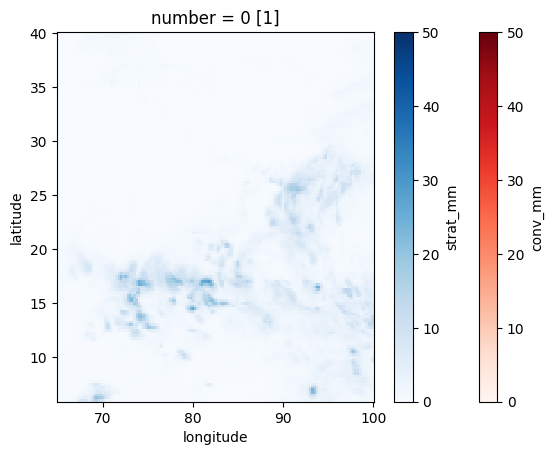

In [ ]:
# Plot daily maxima
merged_ds['conv_mm'].max(dim='time').plot(cmap='Reds', vmax=50)
merged_ds['strat_mm'].max(dim='time').plot(cmap='Blues', vmax=50)


In [ ]:
import pandas as pd

# Convert to millimeters if not already done
merged_ds['conv_mm'] = merged_ds['conv_refined'] * 1000
merged_ds['strat_mm'] = merged_ds['strat_refined'] * 1000

# Select the period 10-15 October 2020
start_date = '2020-10-10'
end_date = '2020-10-15'
subset = merged_ds.sel(time=slice(start_date, end_date))

# Resample daily sums for convective and stratiform rainfall
convective_daily = subset['conv_mm'].resample(time='1D').sum(dim='time')
stratiform_daily = subset['strat_mm'].resample(time='1D').sum(dim='time')

# Extract lat, lon, and dates
lats = subset.latitude.values
lons = subset.longitude.values
dates = pd.to_datetime(convective_daily.time.values)


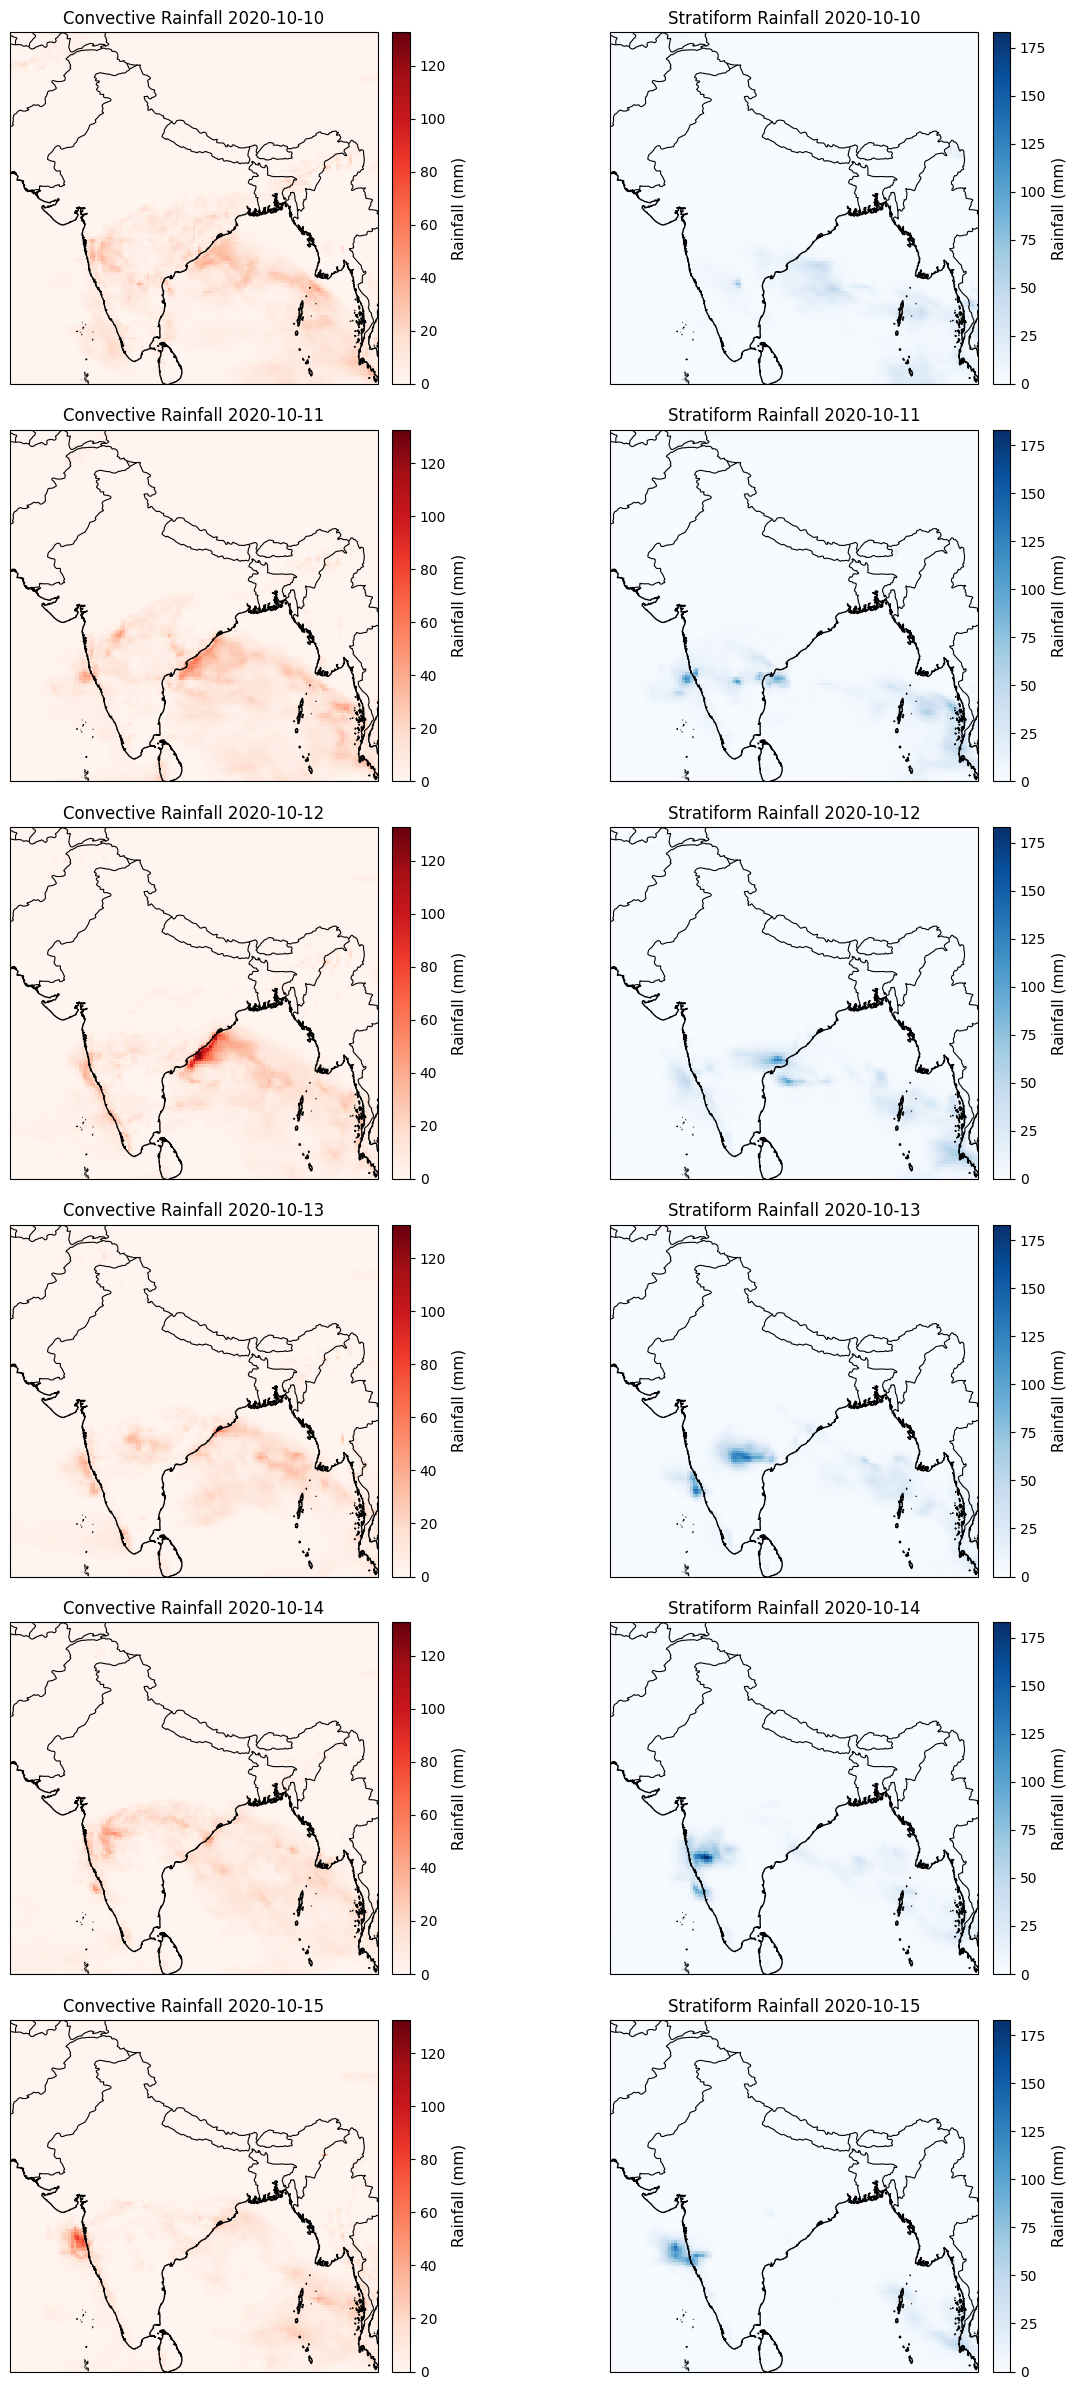

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [66, 100, 6, 38.5]
n_days = len(dates)

fig, axes = plt.subplots(n_days, 2, figsize=(14, 4 * n_days), 
                        subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(n_days):
    # Convective rainfall
    ax = axes[i, 0]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)
    mesh = ax.pcolormesh(lons, lats, convective_daily[i], 
                         cmap='Reds', shading='auto', vmin=0, vmax=float(convective_daily.max()),
                         transform=ccrs.PlateCarree())
    ax.set_title(f'Convective Rainfall {dates[i].strftime("%Y-%m-%d")}')
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, fraction=0.046)
    cbar.set_label('Rainfall (mm)', fontsize=11)

    # Stratiform rainfall
    ax = axes[i, 1]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)
    mesh = ax.pcolormesh(lons, lats, stratiform_daily[i], 
                         cmap='Blues', shading='auto', vmin=0, vmax=float(stratiform_daily.max()),
                         transform=ccrs.PlateCarree())
    ax.set_title(f'Stratiform Rainfall {dates[i].strftime("%Y-%m-%d")}')
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, fraction=0.046)
    cbar.set_label('Rainfall (mm)', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
print("Convective Refined:")
print("Min:", float(merged_ds['conv_refined'].min()))
print("Max:", float(merged_ds['conv_refined'].max()))
print("Mean:", float(merged_ds['conv_refined'].mean()))
print("Std:", float(merged_ds['conv_refined'].std()))

print("\nStratiform Refined:")
print("Min:", float(merged_ds['strat_refined'].min()))
print("Max:", float(merged_ds['strat_refined'].max()))
print("Mean:", float(merged_ds['strat_refined'].mean()))
print("Std:", float(merged_ds['strat_refined'].std()))


Convective Refined:
Min: 0.0
Max: 0.01543081272393465
Mean: 9.463763126404956e-05
Std: 0.00036073787487111986

Stratiform Refined:
Min: 0.0
Max: 0.028877824544906616
Mean: 5.430033343145624e-05
Std: 0.0003032535605598241
